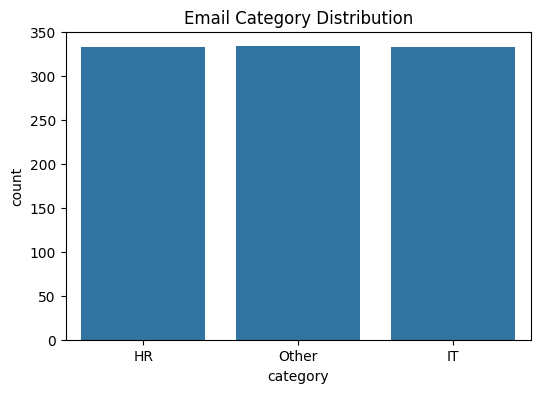

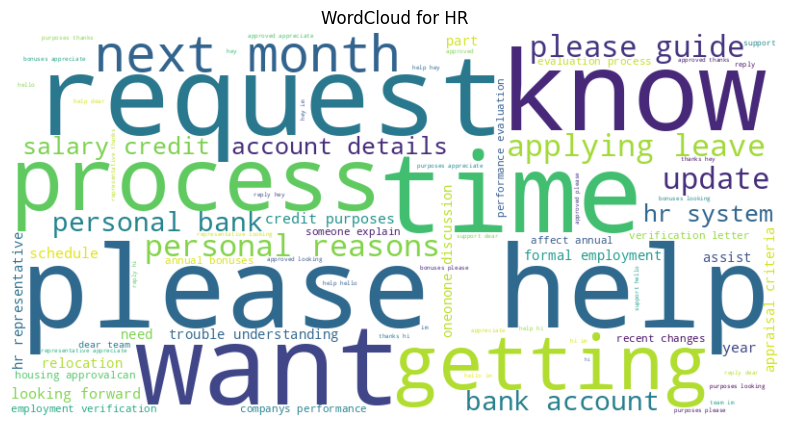

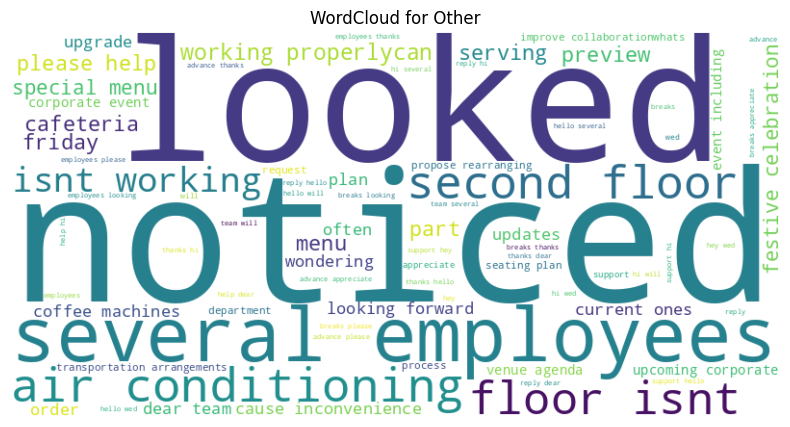

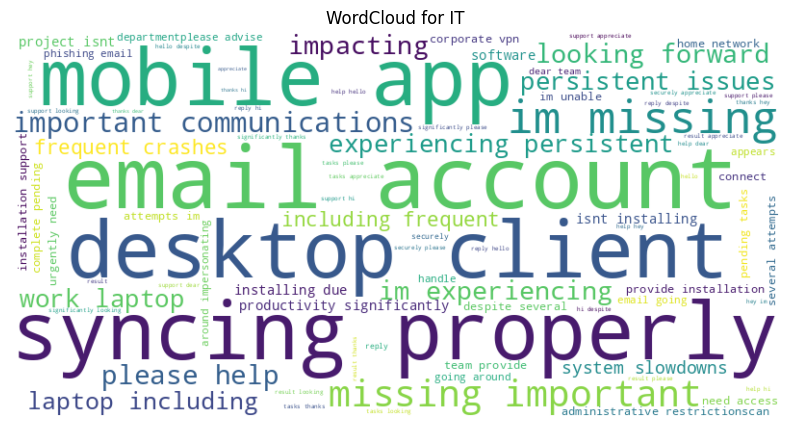

'emails_clean.csv'

In [9]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#  dataset
df = pd.read_csv('/content/emails.csv')

# EDA
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='category')
plt.title('Email Category Distribution')
plt.show()


def clean_text(text):
    text = str(text).lower()  # Lowercase
    text = re.sub(r'\n', ' ', text)  # Remove newlines
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra space
    return text


# Apply cleaning
df['clean_email_text'] = df['email_text'].apply(clean_text)




# WordCloud for each category
for category in df['category'].unique():
    text = ' '.join(df[df['category'] == category]['clean_email_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {category}')
    plt.show()

# save our new data
file_path = 'emails_clean.csv'
df.to_csv(file_path, index=False)

file_path


Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

          HR       1.00      1.00      1.00        67
          IT       1.00      1.00      1.00        66
       Other       1.00      1.00      1.00        67

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



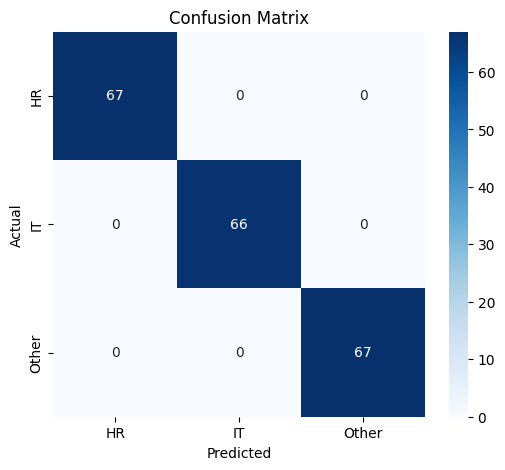

('model.pkl', 'vectorizer.pkl')

In [11]:

import pandas as pd
import numpy as np
import re
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

import matplotlib.pyplot as plt

# dataset
df = pd.read_csv('/content/emails_clean.csv')

# Features and labels
X = df['clean_email_text']
y = df['category']


# Text vectorization using TF IDF
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1,2))
X_vectorized = vectorizer.fit_transform(X)



# Splits
X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y, test_size=0.2, random_state=42, stratify=y
)

# Train RandomForest Classifier
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)



# Predict
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# metrics
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)


#  confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)



plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()





joblib.dump(model, 'model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

print('model.pkl', 'vectorizer.pkl')


In [13]:
### now we can test the models by inputs,

import joblib
import numpy as np

# Load model and vectorizer
model = joblib.load('/content/model.pkl')
vectorizer = joblib.load('/content/vectorizer.pkl')

def classify_email(email_text):
    X = vectorizer.transform([email_text])
    prediction = model.predict(X)[0]
    confidence = np.max(model.predict_proba(X))

    output = {
        "email_text": email_text,
        "predicted_category": prediction,
        "confidence": round(confidence, 2)
    }
    return output

# Example
email = "We're deploying security patches tonight from 10 PM to 1 AM."
result = classify_email(email)

print(result)


{'email_text': "We're deploying security patches tonight from 10 PM to 1 AM.", 'predicted_category': 'IT', 'confidence': np.float64(0.42)}
